In [2]:
# simple word count
#
# code for the Intuitive Text Mining book
# Tariq Rashid, 2018

In [12]:
# import pandas for dataframe functions
import pandas

# collections includes counter
import collections

# regular expressions
import re

# word cloud
import matplotlib.pyplot as plt
import wordcloud

In [4]:
# text passage

text = """
The secret to good pizza is the base.
"""

In [5]:
# text passage

text = """
The secret to good pizza is the base. And that means making the dough properly with your hands. 
Pizza dough isn’t complicated. It’s just flour, water and yeast. To make a good pizza dough, you need finely
milled flour which has a good amount of protein, so not flour for light fluffy cakes. 
"""

In [6]:
# text passage

text = """
The secret to good pizza is the base. And that means making the dough properly with your hands. 
Pizza dough isn’t complicated. It’s just flour, water and yeast. To make a good pizza dough, you need finely
milled flour which has a good amount of protein, so not flour for light fluffy cakes. Mix your quick yeast
into the flour before adding warm water. Use your hands to knead the dough, making some effort to stretch and
fold it. Stretching dough untangles and lengthens the protein strands, making for a more elastic dough ready
to bubble when cooked. Folding ensures a uniform mix of ingredients and also adds air into the dough.
Keeping the dough slightly wet as a less hydrated dough can lead to a biscuit pizza and not the stretchy chewy
Neapolitan pizza we want. After about ten minutes of kneading, the dough should be springing back from
being gently poked. Let the dough rise until it has doubled in size, which should take a few hours. Keep
your dough covered in a damp cloth to stop it drying out. Once it has risen, gently use your fingers to
push down and out to form a flatter pizza shaped disk. Avoid knocking too much air out of it. Add your tomato
passata with dried oregano and salt, and a few toppings, with small torn pieces of mozzarella cheese, and cook at
the highest temperature you can do. Leave any olive oil and basil leaves until after you’ve cooked your
pizza as they burn in the oven. Enjoy!
"""

In [7]:
# remove everything except alphanumeric characters
regex = re.compile('[^a-zA-Z0-9 ]+')
cleaned_text = regex.sub('', text)

# make lowercase
cleaned_text = cleaned_text.lower()

# split the text into words
word_list = cleaned_text.split()

print("number of words = ", len(word_list) )

# dictionary of word counts
wordcount_dict = collections.Counter(word_list)

print("unique words = ", len(wordcount_dict) )

number of words =  247
unique words =  152


In [8]:
df = pandas.DataFrame.from_dict(wordcount_dict, orient="index", columns=['count'])
df.index.name = 'word'
df.sort_values('count', ascending=False, inplace=True)

# show top 10
df[:10]

,count
word,
the,12
dough,11
and,10
a,10
to,7
pizza,6
it,5
your,5
of,5


(-0.5, 1199.5, 799.5, -0.5)

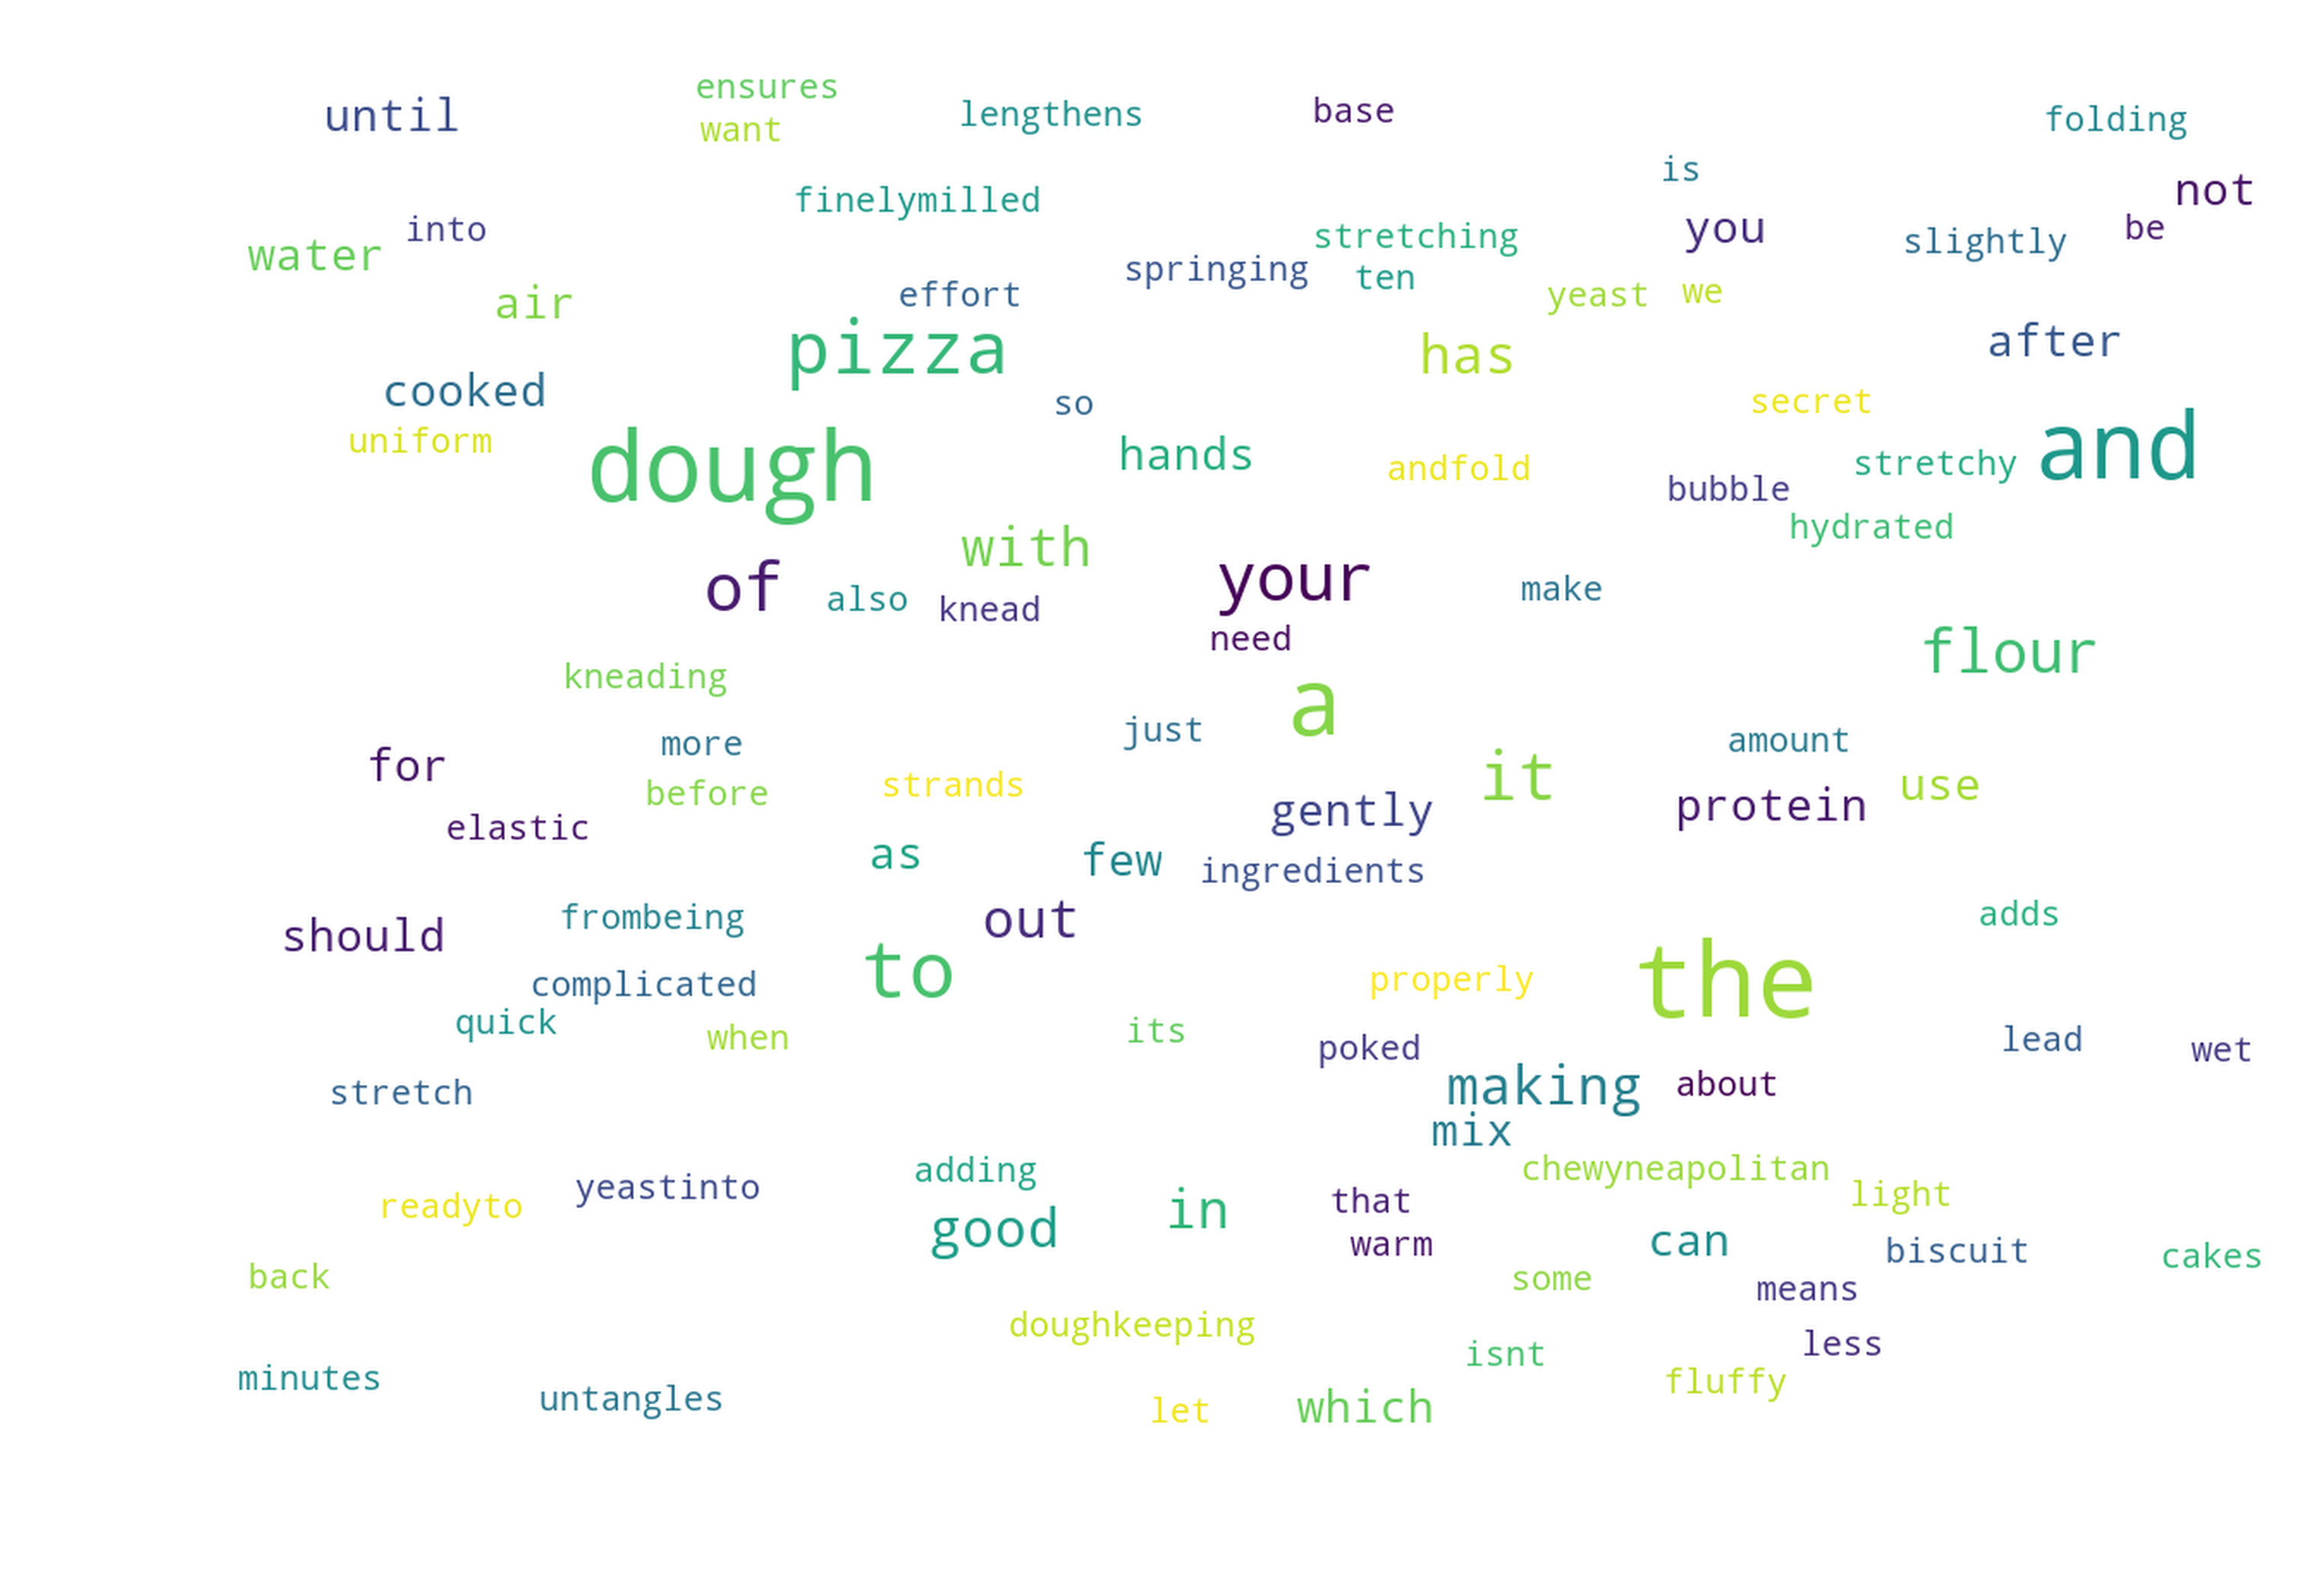

In [63]:
# word cloud

# wordcloud object
wc = wordcloud.WordCloud(colormap='viridis', max_font_size=60, max_words=100, width=1200, height=800, background_color="white", margin=10, prefer_horizontal=1.0)

# words and plot sizes (word count, relevance, etc)
wc.generate_from_frequencies(wordcount_dict)

# plot wordcloud
plt.figure(dpi=600, figsize=(6,4))
plt.imshow(wc, interpolation='lanczos')
plt.axis("off")